    MSE & MAE & Cross Entropy

In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Model-1

# Observed
target_1 = [1,0,0,0,1,0,1,0,0,0,0,1]

# Predicted   
prediction_1 = [0.4,0.3,0.3,0.3,0.4,0.3,0.5,0.2,0.3,0.6,0.2,0.2]

error_1 = []
for i in range(len(target_1)):
    error_1.append(target_1[i] - prediction_1[i])

print("Error_1s: ", error_1)
print(error_1)

squaredError_1 = []
absError_1 = []
for val_1 in error_1:
    squaredError_1.append(val_1 * val_1)#target_1-prediction_1之差平方 
    absError_1.append(abs(val_1))#誤差绝對值

print("Square Error_1: ", squaredError_1)
print("Absolute Val_1ue of Error_1: ", absError_1) 
 
print("MSE = ", sum(squaredError_1) / len(squaredError_1))#均方误差MSE
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError_1) / len(squaredError_1)))#均方根誤差RMSE
print("MAE = ", sum(absError_1) / len(absError_1))#平均绝對誤差MAE
  
target_1Deviation = []
target_1Mean = sum(target_1) / len(target_1)#target_1平均值
for val_1 in target_1:
    target_1Deviation.append((val_1 - target_1Mean) * (val_1 - target_1Mean))
print("Target_1 Variance = ", sum(target_1Deviation) / len(target_1Deviation))#方差

print("Target_1 Standard Deviation = ", sqrt(sum(target_1Deviation) / len(target_1Deviation)))#標準差


Error_1s:  [0.6, -0.3, -0.3, -0.3, 0.6, -0.3, 0.5, -0.2, -0.3, -0.6, -0.2, 0.8]
[0.6, -0.3, -0.3, -0.3, 0.6, -0.3, 0.5, -0.2, -0.3, -0.6, -0.2, 0.8]
Square Error_1:  [0.36, 0.09, 0.09, 0.09, 0.36, 0.09, 0.25, 0.04000000000000001, 0.09, 0.36, 0.04000000000000001, 0.6400000000000001]
Absolute Val_1ue of Error_1:  [0.6, 0.3, 0.3, 0.3, 0.6, 0.3, 0.5, 0.2, 0.3, 0.6, 0.2, 0.8]
MSE =  0.20833333333333334
RMSE =  0.45643546458763845
MAE =  0.4166666666666667
Target_1 Variance =  0.2222222222222223
Target_1 Standard Deviation =  0.47140452079103173


In [3]:
# Model-2

# Observed
target_2 = [1,0,0,0,1,0,1,0,0,0,0,1]

# Predicted   
prediction_2 = [0.8,0.1,0.1,0.1,0.7,0.2,0.7,0.1,0.2,0.4,0.3,0.3]

error_2 = []
for i in range(len(target_2)):
    error_2.append(target_2[i] - prediction_2[i])

print("Error_2s: ", error_2)
print(error_2)

squaredError_2 = []
absError_2 = []
for val_2 in error_2:
    squaredError_2.append(val_2 * val_2)#target_2-prediction_2之差平方 
    absError_2.append(abs(val_2))#誤差绝對值

print("Square Error_2: ", squaredError_2)
print("Absolute Val_2ue of Error_2: ", absError_2) 
 
print("MSE = ", sum(squaredError_2) / len(squaredError_2))#均方误差MSE
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError_2) / len(squaredError_2)))#均方根誤差RMSE
print("MAE = ", sum(absError_2) / len(absError_2))#平均绝對誤差MAE
  
target_2Deviation = []
target_2Mean = sum(target_2) / len(target_2)#target_2平均值
for val_2 in target_2:
    target_2Deviation.append((val_2 - target_2Mean) * (val_2 - target_2Mean))
print("Target_2 Variance = ", sum(target_2Deviation) / len(target_2Deviation))#方差

print("Target_2 Standard Deviation = ", sqrt(sum(target_2Deviation) / len(target_2Deviation)))#標準差


Error_2s:  [0.19999999999999996, -0.1, -0.1, -0.1, 0.30000000000000004, -0.2, 0.30000000000000004, -0.1, -0.2, -0.4, -0.3, 0.7]
[0.19999999999999996, -0.1, -0.1, -0.1, 0.30000000000000004, -0.2, 0.30000000000000004, -0.1, -0.2, -0.4, -0.3, 0.7]
Square Error_2:  [0.03999999999999998, 0.010000000000000002, 0.010000000000000002, 0.010000000000000002, 0.09000000000000002, 0.04000000000000001, 0.09000000000000002, 0.010000000000000002, 0.04000000000000001, 0.16000000000000003, 0.09, 0.48999999999999994]
Absolute Val_2ue of Error_2:  [0.19999999999999996, 0.1, 0.1, 0.1, 0.30000000000000004, 0.2, 0.30000000000000004, 0.1, 0.2, 0.4, 0.3, 0.7]
MSE =  0.09000000000000001
RMSE =  0.30000000000000004
MAE =  0.25
Target_2 Variance =  0.2222222222222223
Target_2 Standard Deviation =  0.47140452079103173


Instructions for updating:
Colocations handled automatically by placer.


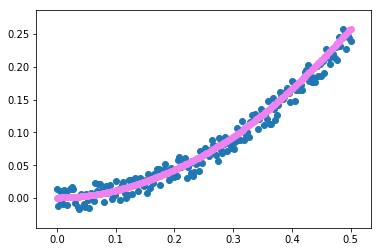

In [4]:
def test_cross_entropy():
    target_2 = np.linspace(0, 0.5, 200)[:, None]
    noise_data = np.random.uniform(-0.02, 0.02, target_2.shape)
    
    prediction_2 = np.square(target_2) + noise_data
    
    x = tf.placeholder(tf.float32, [None, 1])
    y = tf.placeholder(tf.float32, [None, 1])
    weight_layer1 = tf.Variable(tf.random_normal([1, 100]))
    output_layer1 = tf.nn.sigmoid(tf.matmul(x, weight_layer1))

    weight_layer2 = tf.Variable(tf.random_normal([100, 1]))
    logits = tf.matmul(output_layer1, weight_layer2)
    predicts = tf.nn.sigmoid(logits)

    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits))
    train = tf.train.AdamOptimizer(0.01).minimize(loss)

    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        for _ in range(1, 10000):
            session.run(train, feed_dict={x: target_2, y: prediction_2})
        plt.figure()
        plt.scatter(target_2, prediction_2)
        plt.scatter(target_2, session.run(predicts, feed_dict={x: target_2, y: prediction_2}), color='#EE82EE')
        plt.show()


if __name__ == "__main__":
    test_cross_entropy()